# Evaluating Simple Linear Regression
An example of evaluating our Simple Linear Regression model on some data about taxi trips

## 1. Import libraries and load data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/var/folders/jf/hz97w2_s6sv3h8hxx1mhrzqr0000gn/T/ipykernel_43349/2260137157.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("data/taxi_data.csv")

## 2. Determine if we can use Simple Linear Regression
* Data must be quantitative
* Data must have a linear relationship
* Residuals must be normally distributed

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


<Axes: title={'center': 'fare vs distance traveled'}, xlabel='distance_traveled', ylabel='fare'>

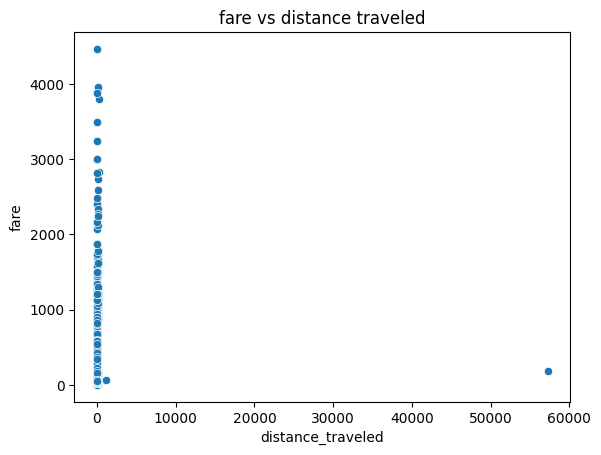

In [4]:
plt.title("fare vs distance traveled")
sns.scatterplot(data=df, x="distance_traveled", y="fare")

<Axes: title={'center': 'fare vs distance traveled'}, xlabel='distance_traveled', ylabel='fare'>

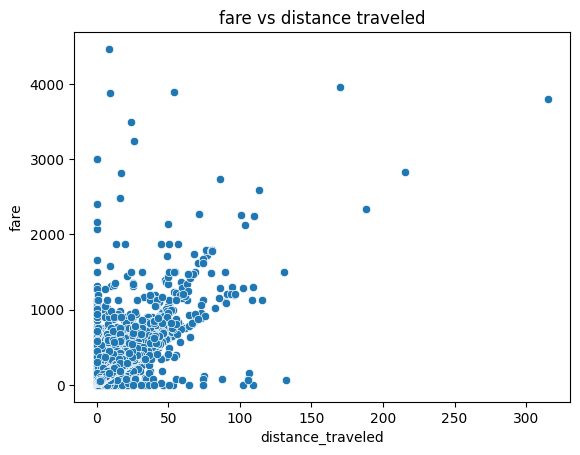

In [5]:
# Identify the outlier
df.loc[df["distance_traveled"] == df["distance_traveled"].max()]

df = df.drop(df.loc[df["distance_traveled"] == df["distance_traveled"].max()].index)
df = df.drop(df.loc[df["distance_traveled"] == df["distance_traveled"].max()].index)
             
plt.title("fare vs distance traveled")
sns.scatterplot(data=df, x="distance_traveled", y="fare")

We've removed the row where distance is 57283.91 and fare is only 187.125. 
We've removed the row where distance is 1136.5 and fare is 61.95.

## 3. Create the Model

In [6]:
# Extract the data
X_train = df[["distance_traveled"]]
y_train = df["fare"]

# Create the model
model = LinearRegression()

# Train the model
model = model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

[14.11940761] 32.19101424810921


## 4. Plot the Line of Best Fit

In [7]:
# Get predicted values
y_pred = model.predict(X_train)

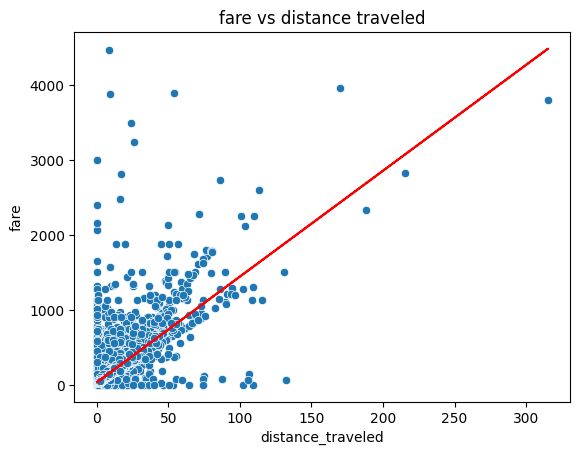

In [8]:
plt.title("fare vs distance traveled")
sns.scatterplot(data=df, x="distance_traveled", y="fare")
plt.plot(X_train, y_pred, color="red")

## 5. Check the Distribution of Residuals

In [9]:
# Calculate residuals
residuals = y_train - y_pred

(-250.0, 250.0)

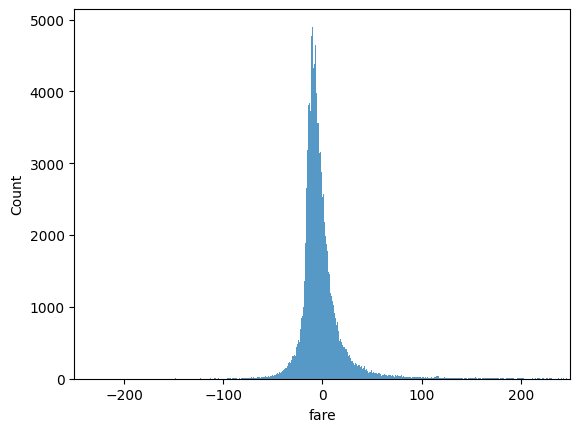

In [10]:
# Graph the residuals
ax = sns.histplot(residuals)
ax.set_xlim(xmin=-250, xmax=250)

Very good distribution of residuals.

<Axes: xlabel='distance_traveled', ylabel='fare'>

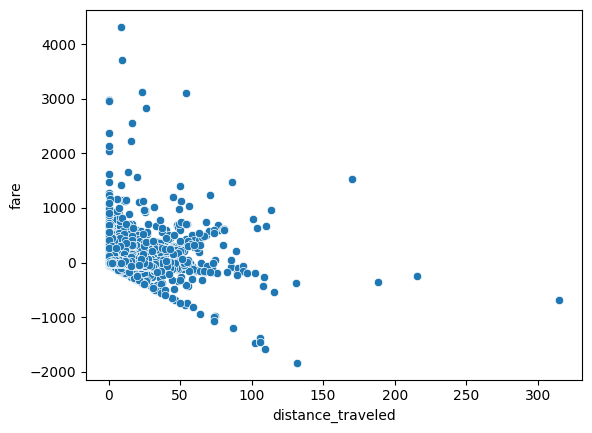

In [11]:
# Scatterplot residuals (Homoscedasticity)
sns.scatterplot(data=X_train, x="distance_traveled", y=residuals)

This doesn't look good at all. It does not show signs of Homoscedasticity. Linear Regression probably isn't the right model for this case.

## 6. Evaluate our Model

In [12]:
# Calculate R^2
model.score(X_train, y_train)

0.6965004131309875